<a href="https://colab.research.google.com/github/Xantosh/ML_Tenorflow/blob/main/Classifying_newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [5]:
test_labels[25]

3

In [4]:
# decoding the sentence back

words_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in words_index.items()]
)

decoded_newswire = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]]
)
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [6]:
# preparing and encodng the data using multi hot encoding of input data

import numpy as np
def vectorize_sequences(sequences, dimension=10000): # creates matrix of row of len of data and each having 10k words
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences): # loop for creating multi hot encoding
    for j in sequence:
      results[i, j] = 1
  return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
# using one hot encoding for labels
def one_hot_encoding(labels, dimensions=46):
  results = np.zeros((len(labels), dimensions))
  for i, label in enumerate(labels):
    results[i ,label] = 1
  return results

In [12]:
# vectorized training labels
#y_train= one_hot_encoding(train_labels)
#y_test = one_hot_encoding(test_labels)
#y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
# alt using tensorflow
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
y_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
# definng the model
from tensorflow import keras
from tensorflow.keras  import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [17]:
# compiling the model
model.compile(
    optimizer="rmsprop",
    loss = "categorical_crossentropy",
    metrics = "accuracy"
)

In [18]:
# setting a validation test

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [19]:
# training the model
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 2s 65ms/step - loss: 3.0876 - accuracy: 0.5182 - val_loss: 2.0796 - val_accuracy: 0.6560
Epoch 2/20
16/16 [==============================] - 1s 47ms/step - loss: 1.5909 - accuracy: 0.7097 - val_loss: 1.3796 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 1s 56ms/step - loss: 1.0991 - accuracy: 0.7764 - val_loss: 1.1760 - val_accuracy: 0.7440
Epoch 4/20
16/16 [==============================] - 1s 93ms/step - loss: 0.8545 - accuracy: 0.8220 - val_loss: 1.0522 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 1s 75ms/step - loss: 0.6846 - accuracy: 0.8583 - val_loss: 0.9882 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.5518 - accuracy: 0.8882 - val_loss: 0.9524 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.4505 - accuracy: 0.9074 - val_loss: 0.9126 - val_accuracy: 0.8150
Epoch 8/20
16

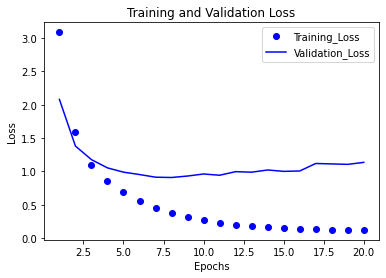

In [21]:
# plotting the training and validation loss
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1 , len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training_Loss")
plt.plot(epochs, val_loss, "b", label="Validation_Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

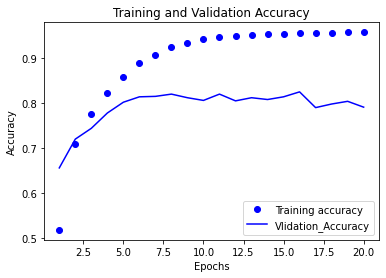

In [22]:
# plotting training and validation accuracy
plt.clf()  # clears existing figure
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
plt.plot(epochs, accuracy, "bo", label = "Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Vlidation_Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [25]:
from re import X
# SINCE MODEL STARTS TO OVERFIT AFTER 9 EPOCHS LETS TRAIN THE MODEL AGAIN
model =  keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(
    optimizer = "rmsprop",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(
    x_train,
    y_train,
    epochs = 9,
    batch_size = 512
)

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 51ms/step - loss: 2.5713 - accuracy: 0.5271
Epoch 2/9
18/18 [==============================] - 1s 47ms/step - loss: 1.3923 - accuracy: 0.7145
Epoch 3/9
18/18 [==============================] - 1s 55ms/step - loss: 1.0393 - accuracy: 0.7756
Epoch 4/9
18/18 [==============================] - 1s 51ms/step - loss: 0.8199 - accuracy: 0.8262
Epoch 5/9
18/18 [==============================] - 1s 84ms/step - loss: 0.6512 - accuracy: 0.8627
Epoch 6/9
18/18 [==============================] - 2s 137ms/step - loss: 0.5213 - accuracy: 0.8903
Epoch 7/9
18/18 [==============================] - 2s 89ms/step - loss: 0.4194 - accuracy: 0.9112
Epoch 8/9
18/18 [==============================] - 1s 65ms/step - loss: 0.3470 - accuracy: 0.9238
Epoch 9/9
71/71 [==============================] - 1s 10ms/step - loss: 0.9556 - accuracy: 0.7912


In [26]:
results   # (test_loss, test_accuracy)

[0.9556369781494141, 0.7911843061447144]

In [28]:
# testing accuracy with random classifier
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18521816562778273

In [ ]:
# random classifier has accuracy of 18%